In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics 

from matplotlib import pyplot as plt
import seaborn as sns

from ipywidgets import interactive
from IPython.display import SVG,display
from itertools import cycle

import numpy as np
from random import sample

In [2]:
df = pd.read_csv('../Sprint 1/keys.csv',';')
df

,Z,CODFAZENDA,SIGLA_FAZENDA,SIGLA_PROJETO,CODTALHAO,SIGLA_TALHAO,AREA_TALHAO,CICLO,ROTACAO,ESPACAMENTO,...,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC,CHOVEU?,QUANTO?,C.DIA ANT?,C.DIA POST?,C.3 DIAS A?,C.3 DIAS D?,ARM/CAD
0,1,1,AFA,AFA 2013,1,1,"50,79",1,1,"3,45 X 2,35",...,"2,04",0,0,N,0,N,N,S,N,2
1,2,1,AFA,AFA 2013,1,1,"50,79",1,1,"3,45 X 2,35",...,"2,04",0,0,S,3,S,S,S,S,3
2,3,1,AFA,AFA 2013,1,1,"50,79",1,1,"3,45 X 2,35",...,"2,04",0,0,S,1,S,S,S,S,2
3,4,1,AFA,AFA 2013,1,1,"50,79",1,1,"3,45 X 2,35",...,"2,04",0,0,S,2,S,S,S,S,2
4,5,1,AFA,AFA 2013,1,1,"50,79",1,1,"3,45 X 2,35",...,"2,04",0,0,N,0,N,S,S,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8216,10076,20,MDA,MDA 2013,533,11,"49,18",1,1,"3,45 X 2,35",...,"6,33",0,0,S,2,S,S,S,S,4
8217,10077,20,MDA,MDA 2013,533,11,"49,18",1,1,"3,45 X 2,35",...,"6,33",0,0,S,2,S,N,S,S,2
8218,10078,20,MDA,MDA 2013,533,11,"49,18",1,1,"3,45 X 2,35",...,"6,33",0,0,N,0,S,S,S,S,4
8219,10080,20,MDA,MDA 2013,533,11,"49,18",1,1,"3,45 X 2,35",...,"6,33",0,0,S,1,S,S,S,S,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8221 entries, 0 to 8220
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Z                         8221 non-null   int64  
 1   CODFAZENDA                8221 non-null   int64  
 2   SIGLA_FAZENDA             8221 non-null   object 
 3   SIGLA_PROJETO             8221 non-null   object 
 4   CODTALHAO                 8221 non-null   int64  
 5   SIGLA_TALHAO              8221 non-null   object 
 6   AREA_TALHAO               8221 non-null   object 
 7   CICLO                     8221 non-null   int64  
 8   ROTACAO                   8221 non-null   int64  
 9   ESPACAMENTO               8221 non-null   object 
 10  SIGLA_MAT_GEN             8221 non-null   object 
 11  DATA_PLANTIO              8221 non-null   object 
 12  MES_PLANTIO               8221 non-null   object 
 13  ANO_PLANTIO               8221 non-null   int64  
 14  DESC_GRP

In [4]:
df["MES_PLANTIO"]=df['DATA_PLANTIO'].apply(lambda x: int(x[3:5]))

In [5]:
df["MES_ATIVIDADE_REALIZ"]=df['DATA_ATIVIDADE_REALIZ'].apply(lambda x: int(x[3:5]))

In [6]:
df.describe()

,Z,CODFAZENDA,CODTALHAO,CICLO,ROTACAO,MES_PLANTIO,ANO_PLANTIO,COD_ATIVIDADE,MES_ATIVIDADE_REALIZ,ANO_ATIVIDADE_REALIZ,DIAS_REF_PLANTIO_REALIZ,QUANTO?,ARM/CAD
count,8221.000000,8221.000000,8221.000000,8221.0,8221.0,8221.000000,8221.000000,8221.000000,8221.000000,8221.000000,8221.000000,8221.000000,8221.000000
mean,5186.049751,8.308113,270.602117,1.0,1.0,6.148522,2014.169809,33.828816,6.363459,2014.961440,294.924462,1.198151,3.512955
std,2930.236234,4.891133,152.361083,0.0,0.0,3.248051,1.195844,19.407334,3.340891,1.567646,490.609249,1.177248,1.157850
min,1.000000,1.000000,1.000000,1.0,1.0,1.000000,2012.000000,1.000000,1.000000,2012.000000,-376.000000,0.000000,1.000000
25%,2623.000000,4.000000,143.000000,1.0,1.0,4.000000,2013.000000,17.000000,4.000000,2014.000000,0.000000,0.000000,3.000000
50%,5235.000000,7.000000,270.000000,1.0,1.0,6.000000,2014.000000,29.000000,6.000000,2015.000000,36.000000,1.000000,4.000000
75%,7771.000000,12.000000,404.000000,1.0,1.0,9.000000,2015.000000,46.400000,9.000000,2016.000000,364.000000,2.000000,5.000000
max,10081.000000,20.000000,533.000000,1.0,1.0,12.000000,2016.000000,74.000000,87.000000,2018.000000,2313.000000,5.000000,5.000000


In [7]:
### Retirando colunas

In [8]:
df = df.drop(columns=["Z"
                      ,"SIGLA_FAZENDA"
                      ,"SIGLA_TALHAO"
                      ,"DATA_PLANTIO"
                      ,"ANO_PLANTIO"
                      ,"COD_ATIVIDADE"
                      ,"MODO_DE_OPERACAO"
                      ,"MODO_DE_APLICACAO"
                      ,"MODO_DE_ACAO"
                      ,"QTDE_REALIZADA_ATIVIDADE"
                      ,"DATA_ATIVIDADE_REALIZ"
                      ,"ANO_ATIVIDADE_REALIZ"
                      ,"DIAS_REF_PLANTIO_REALIZ"
    ,"ROTACAO"
    ,"CICLO"
])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8221 entries, 0 to 8220
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CODFAZENDA               8221 non-null   int64 
 1   SIGLA_PROJETO            8221 non-null   object
 2   CODTALHAO                8221 non-null   int64 
 3   AREA_TALHAO              8221 non-null   object
 4   ESPACAMENTO              8221 non-null   object
 5   SIGLA_MAT_GEN            8221 non-null   object
 6   MES_PLANTIO              8221 non-null   int64 
 7   DESC_GRP_ATIVIDADE       8221 non-null   object
 8   NOME_ATIVIDADE           8221 non-null   object
 9   % AREA                   8221 non-null   object
 10  MES_ATIVIDADE_REALIZ     8221 non-null   int64 
 11  IDADE_TALHAO_ATIVIDADE   8221 non-null   object
 12  IDADE_TALHAO_INVENTARIO  8221 non-null   object
 13  AREA_INVENTARIO          8221 non-null   object
 14  IMA_TALHAO               8221 non-null  

### Funções

### Matriz de correlaçao

###### plota uma matriz de correlação e retorna um dataframe das correlações

In [10]:
def matrizCorrelacao(df):
    n=df
    for col in df.keys():
        n[col],_ = converterDadosMatriz(n, col)
    corrmat = n.corr()
    fig = plt.figure(figsize = (50,50))
    sns.heatmap(corrmat,
                vmax = 1,
                square = True,
                annot = True,
                vmin = -1
               )
    plt.show()
    fig.savefig("matriz.png")
    return corrmat

###### Ajuda a função matrizCorrelacao a tranformar os dados em numericos para que se possa calcular a correlação

In [11]:
def converterDadosMatriz(n, col):
    return pd.factorize(n[col])

### Funções de padronização de dados

###### Esta fução cria a base de dado com os dados que precisa, porem o target precisa estar por ultimo

In [12]:
def criarBaseDados(df, colunas):
    df1=df[colunas]
    return df1

###### Converte os dados para numero e cria um dicionario com os seguintes valores tagert que são os valores escritos de df e o valores de com os numeros

In [13]:
def converterDados(nome, df1):
    dados={}
    dados["target"]= df1[nome].unique()
    df1[nome],_=pd.factorize(df1[nome])
    dados["valores"]= df1[nome].unique()
    for x in range(len(dados["target"])):
        print("target: %s = %s" %(dados["target"][x],dados["valores"][x]))
    return dados   

#### Converter numeros com padrão brasileiro para americano

In [14]:
def converterDadosB(df1, coluna):
    df1[coluna]=df1[coluna].apply(lambda x: str(x).replace(",","."))
    df1[coluna]= df1[coluna].astype("float64")

### Funções que cria teste e treinamento

##### Função que cria teste e treinamento supervisionado
###### Cria os dados de teste e de treinamento com a porcentagem de 30% para teste com um target

In [15]:
def criarTesteTreinamento(target, novo):
    dados={}
    ##Separa os dados do target
    feature_cols = novo.keys()
    x_train = novo[feature_cols[:-1]]
    y_train = novo[target]
    
    ## criar ambiente de teste
    x_train, x_test, y_train, y_test = train_test_split(
    x_train, y_train,test_size=0.3,random_state=1)
    
    dados["x_train"]=x_train
    dados["y_train"]=y_train
    dados["x_test"]=x_test
    dados["y_test"]=y_test
    return dados

#### Função que cria teste e treinamento não supervisionado
###### Cria os dados de teste e de treinamento com a porcentagem de 30% para teste sem um target

In [16]:
def criarTestTrainUnsupervised(df):
    dados={}
    x_train = df
    ## criar ambiente de teste
    x_train, x_test = train_test_split(
    x_train ,test_size=0.3,random_state=1)
    
    dados["x_train"]=x_train
    dados["x_test"]=x_test
    return dados

### Função da arvore de decisão

##### Funções não automatizadas

###### Treina a arvore e plota os resultados

In [17]:
def treinarPlotar(arvore, dados, target):
    #treina
    arvore = arvore.fit(dados["x_train"],dados["y_train"])
    #plota
    fig = plt.figure(figsize=(50,30))
    _= tree.plot_tree(arvore, feature_names=dados["x_train"].columns,class_names=target,
    filled=True, rounded=True)  
    fig.savefig("decisiontree.svg", format='svg',dpi=1200)

###### Verifica a arvore e mostra a acuracia(quanto maior melhor) e amostra erroneamente(quanto menor melhor)

In [18]:
def verificarArvore(dados, arvore):
    y_pred=arvore.predict(dados["x_test"])
    
    count=(dados["y_test"]!=y_pred).sum()
    print('Amostras erroneamente classificadas: {}'.format(count))
    #Taxa de precisão
    accuracy = metrics.accuracy_score(dados["y_test"], y_pred)
    print('Acuracia: {:.2f}'.format(accuracy))

### Função automatizada da arvore

###### Classe que em globa as função de arvore

In [19]:
class Arvore:
    
    def __init__(self, dados, target):
        self.dados= dados
        self.target = target
        
    def criarArvore(self, crit, split,depth, split_folha, leaf_folha):
        arvore = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=split_folha
          ,min_samples_leaf=leaf_folha
        )
        #treina
        arvore = arvore.fit(self.dados["x_train"],self.dados["y_train"])
        #plota
        
        fig = plt.figure(figsize=(50,30))
        _= tree.plot_tree(arvore, feature_names=self.dados["x_train"].columns,class_names=self.target,
        filled=True, rounded=True)  
        fig.savefig("decisiontree.svg", format='svg',dpi=1200)
        
        y_pred=arvore.predict(self.dados["x_test"])
        count=(self.dados["y_test"]!=y_pred).sum()
        print('Amostras erroneamente classificadas: {}'.format(count))
        #Taxa de precisão
        accuracy = metrics.accuracy_score(self.dados["y_test"], y_pred)
        print('Acuracia: {:.2f}'.format(accuracy)) 

###### Função que faz o usuario interagir com o algoritimo e parametros

In [20]:
def interador(dados, target):
    a= Arvore(dados, target)
    inter=interactive(a.criarArvore 
        , crit = ["entropy","gini"]
        , split = ["best", "random"]            
        , depth=[None,1,2,3,4,5,10,20,30]
        , split_folha=(1,50)
        , leaf_folha=(1,40))
    display(inter)

### Função do algoritimo de clusterização

##### Calcula a inercia dos dados ao numero de clusters 

In [21]:
def calcularInercia(dados1):
    #calcula a inercia para cada cluster
    inercias=[]
    maxclusters=11
    for i in range(1,maxclusters):
        km = KMeans(n_clusters=i, init="k-means++")
        km.fit(dados1["x_train"])
        print(i, km.inertia_)
        inercias.append(km.inertia_)
        
    #plota a inercia para cada cluster    
    plt.plot(range(1, maxclusters),inercias, marker="o")
    plt.title("O metodo Elbow")
    plt.xlabel("Quant de clusters")
    plt.ylabel("Inercia")
    plt.show()

##### Cria os clusters, treina e retorna um dicionario com os seguintes dados Label(referece o numero no cluster para cada linha), centroid(estão a localização dos centroid) e o Kmeans( armazena o algoritimo ja treinado).

In [22]:
def criarCluster(n_cluster, dados1):
    km= {}
    #configuração do cluster
    kmeans = KMeans(n_clusters=n_cluster, init="k-means++", n_init=30)
    #treina o algoritimo
    kmeans.fit(dados1["x_train"])
    # cria um uma celuda na dataframe que categoriza as linhas referentes a cada cluster
    km["Label"] = kmeans.labels_
    km["centroid"] = kmeans.cluster_centers_
    km["Kmeans"] = kmeans
    return km

##### Mostra a media do clusters com um dataFrame

In [23]:
def mostrarMediaCluster(df):
    return df.groupby("Clusters").mean()

##### Plota a medias de cada cluster

In [24]:
def plotagemBarraClusters(df):
    clusters= df["Clusters"].unique()
    print(clusters)
    sd = df.groupby("Clusters").mean()
    sd.plot.bar(figsize=(16, 10), ylabel="Media", title="Medias dos clusters")

##### Plota a localização dos dados ao centroides( o centroides são vermelhos)

In [25]:
def plotaCirculo(colunas, dados1, k):
    kmeans=k
    def plotar(coluna_1, coluna_2):
        plt.scatter(dados1[coluna_1], dados1[coluna_2], s=50, c=kmeans.labels_)
        plt.scatter(kmeans.cluster_centers_[:,colunas.index(coluna_1)],
                    kmeans.cluster_centers_[:,colunas.index(coluna_2)],
                    s=20, c='red')
        plt.title("Cluster centroide customizado")
        plt.xlabel(coluna_1)
        plt.ylabel(coluna_2)
        plt.show()
    controler= interactive(plotar
                           , coluna_1=colunas
                           , coluna_2=colunas)
    display(controler)

##### Função que prediz os dados correspode as caracteristicas de um certo cluster

In [26]:
def predizer(k, colunas):
    kmeans = k
    cs = kmeans.predict([colunas])
    for c in cs:
        print("O cluster correspondente é o",(c+1))

## Matriz de correlação

In [27]:
colunas =["AREA_TALHAO",
                         "ESPACAMENTO",
                         "SIGLA_MAT_GEN",
                         "MES_PLANTIO",
                         "DESC_GRP_ATIVIDADE",
                         "NOME_ATIVIDADE",
                         "% AREA",
                         "MES_ATIVIDADE_REALIZ",
                         "IDADE_TALHAO_ATIVIDADE",
                         "IDADE_TALHAO_INVENTARIO",
                         "AREA_INVENTARIO",
                         "CHOVEU?",
                         "QUANTO?",
                         "C.DIA ANT?",
                         "C.DIA POST?",
                         "C.3 DIAS A?",
                         "C.3 DIAS D?",
                         "ARM/CAD",
                         "IMA_TALHAO",
                         "VOLUME_HA_TALHAO",
                         "FUSTES_HA",
                         "DIAM_MED_TALHAO",
                         "ALTURA_MED_TALHAO",
                         "MORTES_PERC",
                         "FALHA_PERC",
                         "QUEBRADAS_PERC",
                         "TOMBADAS_PERC"]
matriz = criarBaseDados(df,colunas)

c:\users\thiago\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


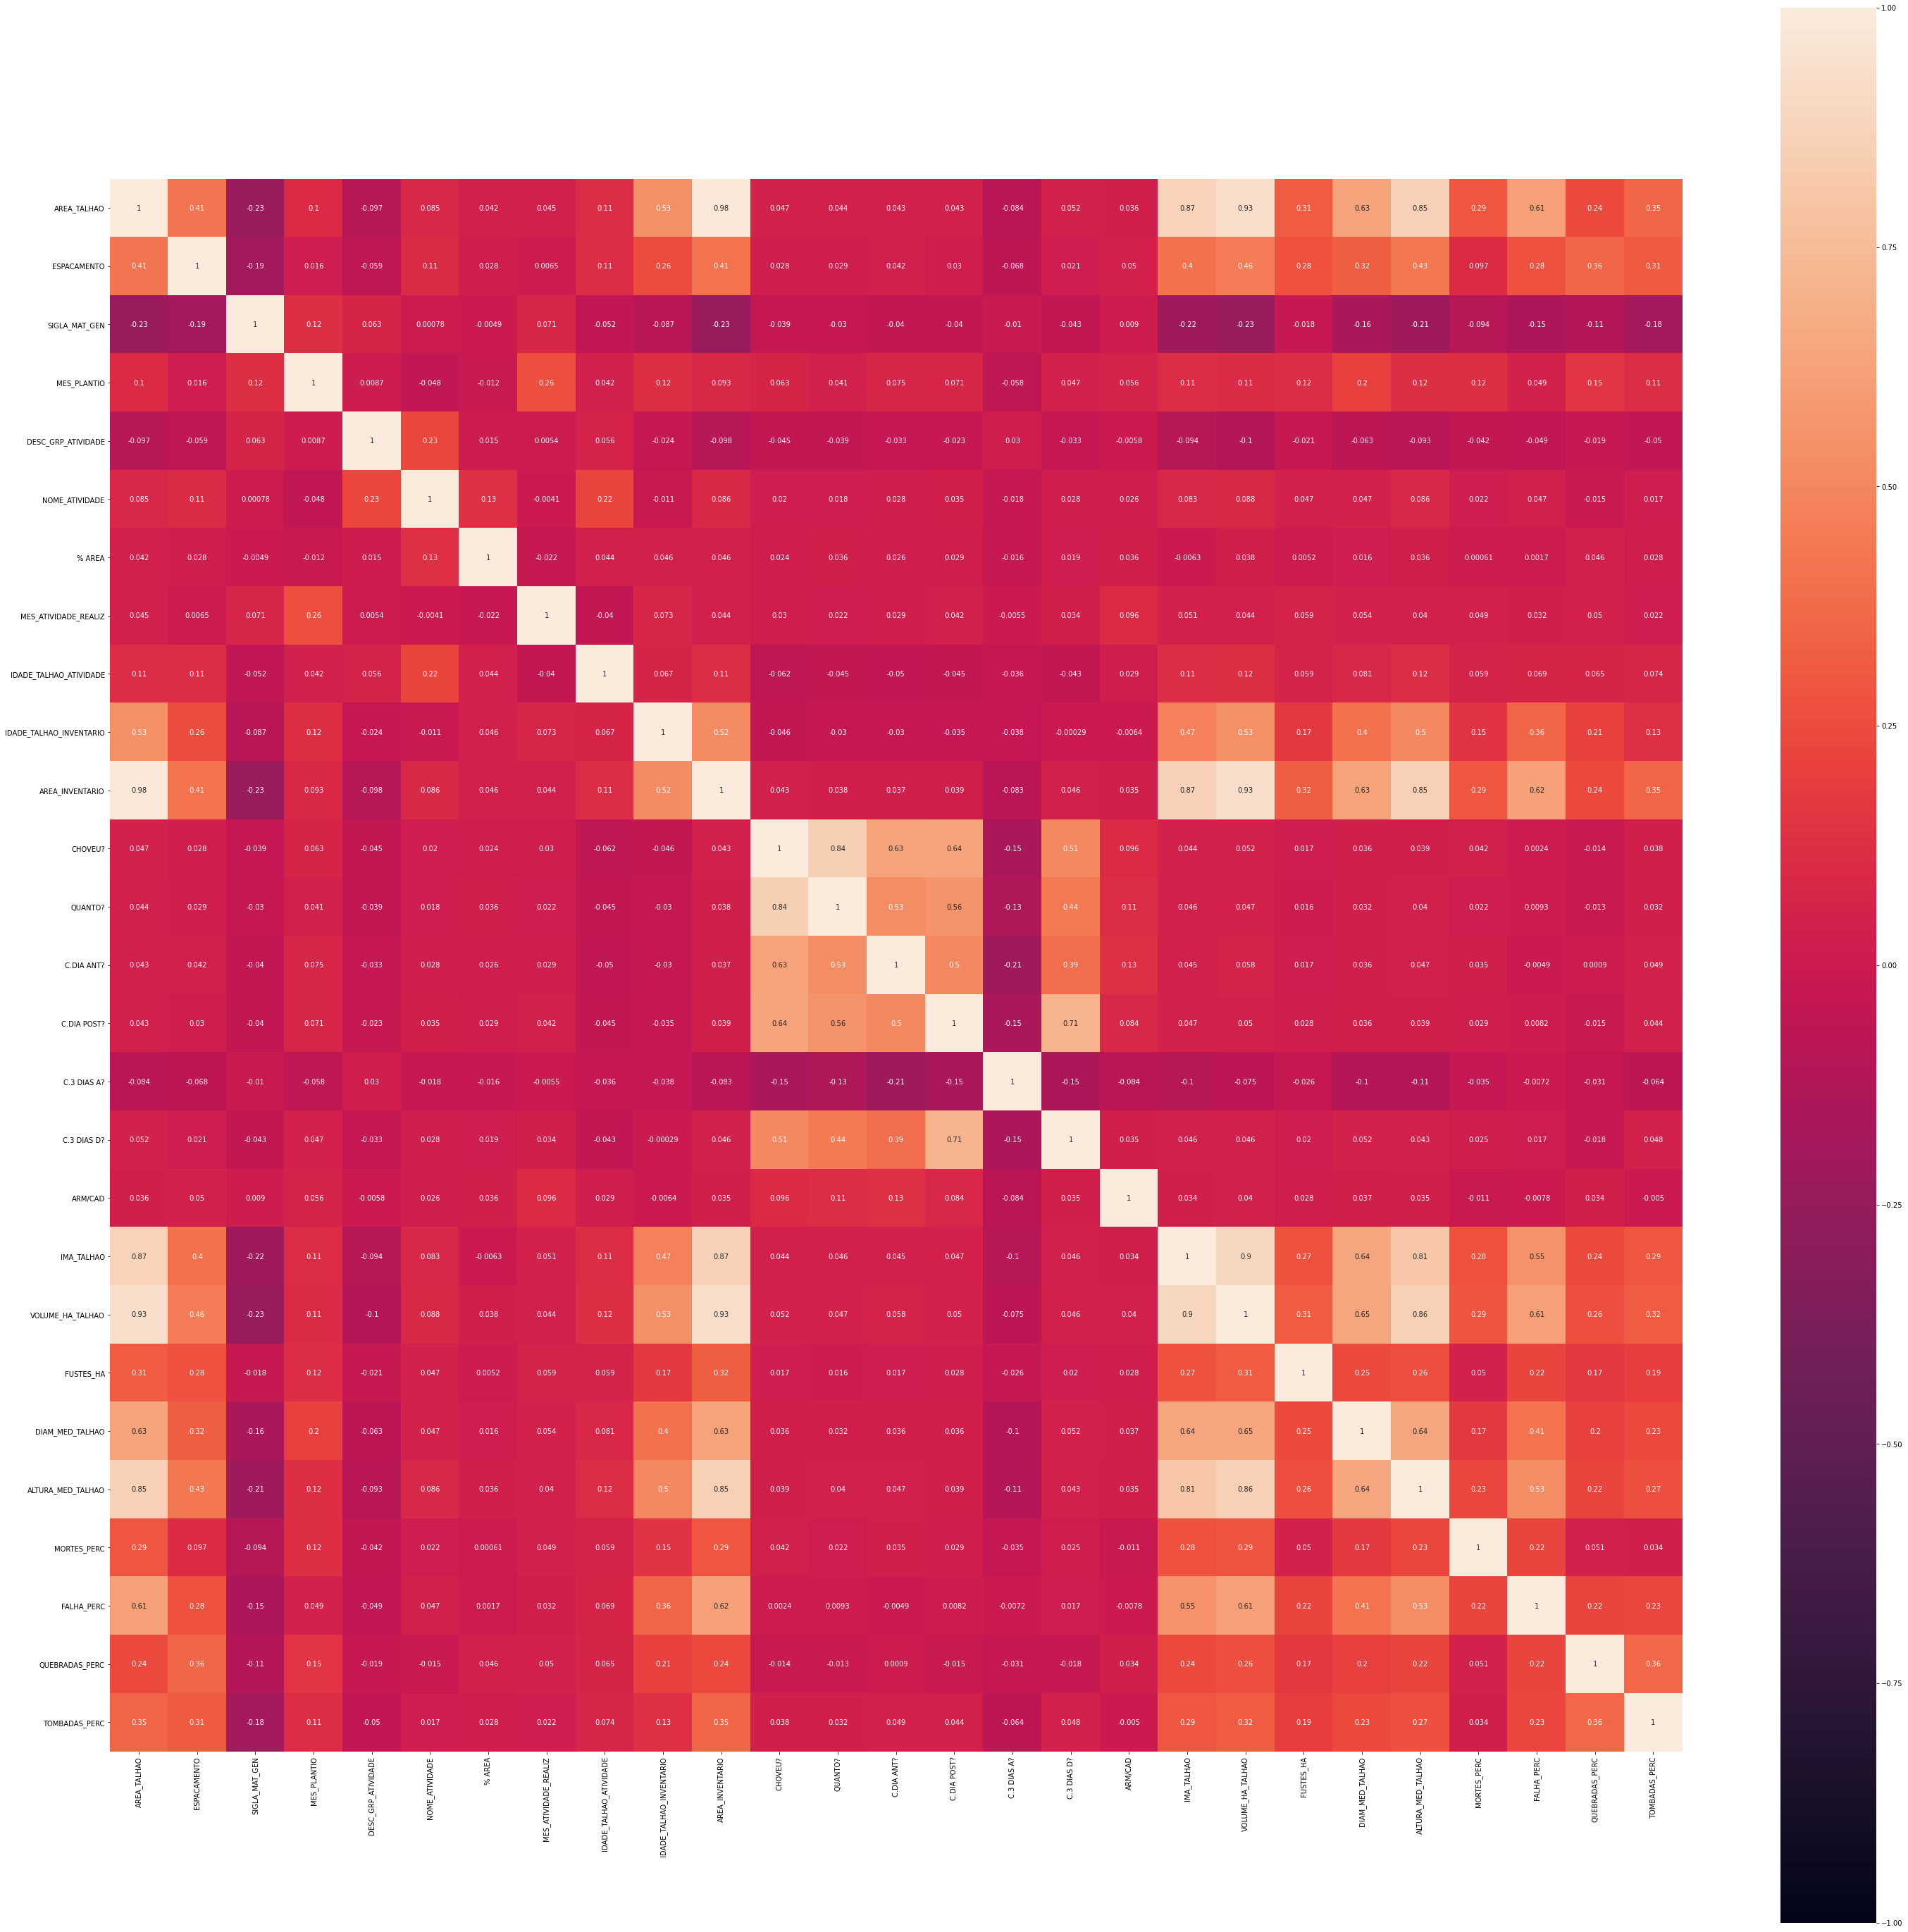

In [28]:
corr= matrizCorrelacao(matriz)

In [29]:
corr

,AREA_TALHAO,ESPACAMENTO,SIGLA_MAT_GEN,MES_PLANTIO,DESC_GRP_ATIVIDADE,NOME_ATIVIDADE,% AREA,MES_ATIVIDADE_REALIZ,IDADE_TALHAO_ATIVIDADE,IDADE_TALHAO_INVENTARIO,...,ARM/CAD,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC
AREA_TALHAO,1.000000,0.414152,-0.231747,0.100982,-0.097264,0.084705,0.042436,0.045386,0.112003,0.531843,...,0.035920,0.869256,0.930027,0.313810,0.634325,0.853223,0.290392,0.613336,0.240562,0.349178
ESPACAMENTO,0.414152,1.000000,-0.193487,0.015729,-0.058632,0.109254,0.028220,0.006510,0.114174,0.256865,...,0.049907,0.402318,0.458783,0.276206,0.321936,0.430955,0.097102,0.276046,0.355490,0.308824
SIGLA_MAT_GEN,-0.231747,-0.193487,1.000000,0.118018,0.063493,0.000785,-0.004915,0.070692,-0.051546,-0.086605,...,0.009012,-0.217174,-0.230955,-0.017506,-0.164005,-0.213817,-0.094064,-0.145326,-0.114712,-0.183024
MES_PLANTIO,0.100982,0.015729,0.118018,1.000000,0.008717,-0.047774,-0.012466,0.258602,0.041798,0.118331,...,0.055778,0.113200,0.109156,0.115321,0.201166,0.120549,0.118600,0.048999,0.150011,0.113361
DESC_GRP_ATIVIDADE,-0.097264,-0.058632,0.063493,0.008717,1.000000,0.233163,0.014782,0.005365,0.056143,-0.024252,...,-0.005817,-0.093990,-0.101796,-0.021466,-0.063097,-0.092810,-0.042144,-0.049325,-0.018532,-0.049738
NOME_ATIVIDADE,0.084705,0.109254,0.000785,-0.047774,0.233163,1.000000,0.130371,-0.004119,0.219964,-0.011291,...,0.026006,0.083139,0.088378,0.047018,0.047488,0.085603,0.021799,0.046634,-0.014599,0.016997
% AREA,0.042436,0.028220,-0.004915,-0.012466,0.014782,0.130371,1.000000,-0.021897,0.043607,0.045930,...,0.035573,-0.006316,0.037663,0.005186,0.015845,0.036004,0.000612,0.001749,0.045757,0.028038
MES_ATIVIDADE_REALIZ,0.045386,0.006510,0.070692,0.258602,0.005365,-0.004119,-0.021897,1.000000,-0.040028,0.073029,...,0.096327,0.051373,0.044450,0.059106,0.054465,0.039762,0.048559,0.031825,0.049824,0.022389
IDADE_TALHAO_ATIVIDADE,0.112003,0.114174,-0.051546,0.041798,0.056143,0.219964,0.043607,-0.040028,1.000000,0.066947,...,0.028538,0.110181,0.118728,0.058506,0.081059,0.116624,0.058793,0.069260,0.065203,0.074125
IDADE_TALHAO_INVENTARIO,0.531843,0.256865,-0.086605,0.118331,-0.024252,-0.011291,0.045930,0.073029,0.066947,1.000000,...,-0.006389,0.474083,0.534763,0.170994,0.403425,0.502576,0.146728,0.359141,0.210141,0.125530


### Verificando quais dados são o melhor

In [30]:
corr.query("FALHA_PERC !=1 & FALHA_PERC > 0.39 | FALHA_PERC  < -0.39")

,AREA_TALHAO,ESPACAMENTO,SIGLA_MAT_GEN,MES_PLANTIO,DESC_GRP_ATIVIDADE,NOME_ATIVIDADE,% AREA,MES_ATIVIDADE_REALIZ,IDADE_TALHAO_ATIVIDADE,IDADE_TALHAO_INVENTARIO,...,ARM/CAD,IMA_TALHAO,VOLUME_HA_TALHAO,FUSTES_HA,DIAM_MED_TALHAO,ALTURA_MED_TALHAO,MORTES_PERC,FALHA_PERC,QUEBRADAS_PERC,TOMBADAS_PERC
AREA_TALHAO,1.000000,0.414152,-0.231747,0.100982,-0.097264,0.084705,0.042436,0.045386,0.112003,0.531843,...,0.035920,0.869256,0.930027,0.313810,0.634325,0.853223,0.290392,0.613336,0.240562,0.349178
AREA_INVENTARIO,0.984061,0.411935,-0.227375,0.092621,-0.097833,0.086179,0.045752,0.043963,0.110484,0.517734,...,0.035457,0.865117,0.930646,0.321493,0.629632,0.853185,0.289217,0.617927,0.235876,0.347542
IMA_TALHAO,0.869256,0.402318,-0.217174,0.113200,-0.093990,0.083139,-0.006316,0.051373,0.110181,0.474083,...,0.034418,1.000000,0.895826,0.274590,0.643495,0.811045,0.275062,0.551619,0.235313,0.292625
VOLUME_HA_TALHAO,0.930027,0.458783,-0.230955,0.109156,-0.101796,0.088378,0.037663,0.044450,0.118728,0.534763,...,0.039863,0.895826,1.000000,0.313861,0.645580,0.858465,0.286073,0.612576,0.264523,0.316975
DIAM_MED_TALHAO,0.634325,0.321936,-0.164005,0.201166,-0.063097,0.047488,0.015845,0.054465,0.081059,0.403425,...,0.036512,0.643495,0.645580,0.248115,1.000000,0.643713,0.168738,0.407148,0.203718,0.234827
ALTURA_MED_TALHAO,0.853223,0.430955,-0.213817,0.120549,-0.092810,0.085603,0.036004,0.039762,0.116624,0.502576,...,0.034833,0.811045,0.858465,0.260501,0.643713,1.000000,0.234268,0.526605,0.219150,0.268396


# Pergunta:  A CHUVA INTERFERE NO PLANTIO

#### Para responder esta pergunta vou criar tres amostra que representão a população, porem vou precisar converter a base dos dados para assim criar as amostras. Isto precisou ser feito para que não ocorra nenhuma diferenca das amostras e nas analises

### Criando base de dados com os campos que preciso

In [31]:
colunas = ["CODTALHAO","QUANTO?","CHOVEU?",
           "SIGLA_MAT_GEN","ESPACAMENTO","ALTURA_MED_TALHAO","FALHA_PERC","ARM/CAD","MES_PLANTIO"]

In [32]:
df1= criarBaseDados(df, colunas)

### Transformando os dados

In [33]:
valor2 = converterDados("CHOVEU?",df1 )

target: N = 0
target: S = 1


c:\users\thiago\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
valor3 = converterDados("SIGLA_MAT_GEN",df1)

target: AEC0144 = 0
target: VT01 = 1
target: VT04 = 2
target: IPB1 = 3
target: IPB2 = 4
target: IPB13 = 5
target: AEC0344 = 6
target: A211 = 7
target: A217 = 8
target: IPB26 = 9
target: IPB22 = 10
target: 1407 = 11


c:\users\thiago\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [35]:
valor4 = converterDados("ESPACAMENTO",df1)

c:\users\thiago\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


target: 3,45 X 2,35 = 0
target: 3,5 X 2,15 = 1
target: 3,45 x 3,20 = 2


In [36]:
converterDadosB(df1, "ALTURA_MED_TALHAO")

c:\users\thiago\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\thiago\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
converterDadosB(df1, "FALHA_PERC")

c:\users\thiago\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\thiago\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Vendo infomações no meus campos referente a base de dados

In [38]:
df1.describe()

,CODTALHAO,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD,MES_PLANTIO
count,8221.000000,8221.000000,8221.000000,8221.000000,8221.000000,8221.000000,8221.000000,8221.000000,8221.000000
mean,270.602117,1.198151,0.637149,2.177351,0.241333,20.605215,3.593152,3.512955,6.148522
std,152.361083,1.177248,0.480852,2.406940,0.471473,3.391827,3.459568,1.157850,3.248051
min,1.000000,0.000000,0.000000,0.000000,0.000000,11.560000,0.000000,1.000000,1.000000
25%,143.000000,0.000000,0.000000,0.000000,0.000000,17.780000,1.280000,3.000000,4.000000
50%,270.000000,1.000000,1.000000,1.000000,0.000000,21.080000,2.740000,4.000000,6.000000
75%,404.000000,2.000000,1.000000,4.000000,0.000000,23.480000,4.890000,5.000000,9.000000
max,533.000000,5.000000,1.000000,11.000000,2.000000,26.680000,29.410000,5.000000,12.000000


#### Criando as amostras

In [39]:
amostra1 = sample(range(df1["CODTALHAO"].min(), df1["CODTALHAO"].max()), 250)
amostra1

[270,
 227,
 519,
 491,
 294,
 18,
 321,
 282,
 187,
 31,
 10,
 93,
 297,
 152,
 525,
 291,
 451,
 273,
 203,
 400,
 288,
 440,
 505,
 508,
 121,
 431,
 392,
 29,
 158,
 372,
 70,
 353,
 117,
 177,
 136,
 149,
 261,
 382,
 162,
 471,
 496,
 141,
 313,
 452,
 426,
 23,
 107,
 229,
 133,
 328,
 396,
 8,
 156,
 252,
 470,
 271,
 220,
 493,
 259,
 249,
 522,
 483,
 39,
 84,
 312,
 161,
 122,
 200,
 59,
 364,
 384,
 14,
 209,
 351,
 57,
 314,
 311,
 27,
 300,
 34,
 517,
 434,
 315,
 317,
 324,
 60,
 476,
 494,
 250,
 373,
 245,
 75,
 52,
 339,
 242,
 305,
 499,
 275,
 299,
 412,
 48,
 118,
 246,
 274,
 109,
 112,
 362,
 110,
 51,
 120,
 24,
 348,
 301,
 86,
 430,
 263,
 218,
 167,
 9,
 240,
 165,
 511,
 195,
 79,
 82,
 280,
 334,
 113,
 134,
 63,
 409,
 130,
 507,
 316,
 503,
 232,
 164,
 231,
 304,
 393,
 114,
 192,
 83,
 486,
 327,
 139,
 251,
 342,
 423,
 322,
 492,
 230,
 76,
 357,
 49,
 381,
 12,
 62,
 277,
 36,
 7,
 469,
 463,
 119,
 346,
 262,
 228,
 504,
 490,
 206,
 90,
 193,
 95,


In [40]:
amostra2 = sample(range(df1["CODTALHAO"].min(), df1["CODTALHAO"].max()), 250)
amostra2

[128,
 20,
 346,
 531,
 349,
 299,
 309,
 514,
 433,
 430,
 270,
 68,
 401,
 385,
 275,
 436,
 159,
 184,
 455,
 30,
 106,
 114,
 61,
 39,
 447,
 187,
 339,
 216,
 192,
 176,
 185,
 489,
 384,
 263,
 499,
 316,
 308,
 400,
 236,
 505,
 268,
 372,
 429,
 40,
 131,
 313,
 457,
 404,
 382,
 522,
 488,
 251,
 173,
 1,
 390,
 123,
 253,
 446,
 403,
 237,
 271,
 520,
 376,
 140,
 103,
 327,
 242,
 158,
 332,
 319,
 452,
 101,
 142,
 331,
 69,
 272,
 529,
 371,
 105,
 49,
 343,
 195,
 500,
 58,
 494,
 422,
 27,
 214,
 206,
 524,
 259,
 193,
 169,
 526,
 344,
 83,
 250,
 437,
 32,
 104,
 60,
 295,
 280,
 85,
 411,
 364,
 294,
 314,
 138,
 62,
 361,
 306,
 51,
 301,
 305,
 317,
 337,
 434,
 89,
 425,
 365,
 124,
 79,
 174,
 366,
 5,
 487,
 296,
 413,
 18,
 11,
 336,
 333,
 348,
 485,
 276,
 53,
 94,
 21,
 277,
 267,
 166,
 402,
 506,
 210,
 428,
 367,
 71,
 474,
 56,
 240,
 44,
 304,
 464,
 406,
 300,
 256,
 293,
 45,
 458,
 471,
 484,
 498,
 67,
 492,
 360,
 283,
 215,
 59,
 354,
 394,
 389,
 

In [41]:
amostra3 = sample(range(df1["CODTALHAO"].min(), df1["CODTALHAO"].max()), 250)
amostra3

[171,
 236,
 58,
 513,
 3,
 114,
 120,
 95,
 484,
 139,
 498,
 60,
 322,
 184,
 144,
 301,
 396,
 244,
 217,
 300,
 80,
 303,
 160,
 379,
 238,
 421,
 39,
 428,
 81,
 181,
 305,
 36,
 512,
 246,
 528,
 269,
 309,
 324,
 110,
 372,
 107,
 392,
 138,
 233,
 506,
 420,
 68,
 446,
 331,
 532,
 100,
 327,
 499,
 122,
 117,
 418,
 406,
 387,
 286,
 480,
 175,
 470,
 89,
 374,
 253,
 259,
 353,
 265,
 341,
 315,
 500,
 394,
 268,
 11,
 172,
 377,
 511,
 62,
 45,
 463,
 451,
 458,
 488,
 208,
 183,
 48,
 67,
 347,
 529,
 186,
 14,
 263,
 310,
 283,
 223,
 24,
 207,
 97,
 130,
 277,
 66,
 258,
 46,
 492,
 93,
 21,
 490,
 22,
 335,
 279,
 435,
 281,
 131,
 287,
 209,
 471,
 404,
 82,
 214,
 280,
 157,
 77,
 133,
 510,
 449,
 257,
 19,
 325,
 232,
 273,
 152,
 362,
 104,
 197,
 118,
 381,
 170,
 376,
 7,
 289,
 249,
 380,
 204,
 321,
 124,
 424,
 13,
 76,
 284,
 274,
 125,
 85,
 235,
 423,
 38,
 226,
 375,
 28,
 169,
 37,
 414,
 388,
 403,
 468,
 174,
 250,
 99,
 474,
 445,
 56,
 430,
 147,
 242,

### Criando tres amostras

In [42]:
colunas = ["QUANTO?","CHOVEU?","SIGLA_MAT_GEN","ESPACAMENTO","ALTURA_MED_TALHAO","FALHA_PERC","ARM/CAD","MES_PLANTIO"]

#### Amostra 1

In [43]:
amostra1= df1.query("CODTALHAO in %s" %amostra1)
amostra1= criarBaseDados(amostra1, colunas)
amostra1 = amostra1.sort_values(by='MES_PLANTIO')
amostra1

,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD,MES_PLANTIO
4839,0,0,1,0,22.26,3.13,2,1
7739,3,1,0,1,18.68,7.58,5,1
7740,3,1,0,1,18.68,7.58,5,1
7741,3,1,0,1,18.68,7.58,5,1
7742,3,1,0,1,18.68,7.58,5,1
...,...,...,...,...,...,...,...,...
2351,3,1,1,0,20.87,1.92,2,12
2350,3,1,1,0,20.87,1.92,3,12
2349,3,1,1,0,20.87,1.92,5,12
2355,2,1,1,0,20.87,1.92,2,12


#### Vendo infomações da 1° amostra

In [44]:
amostra1.describe()

,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD,MES_PLANTIO
count,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000
mean,1.207314,0.641936,2.062089,0.202841,20.751573,3.616485,3.486451,6.094975
std,1.174581,0.479494,2.322620,0.414414,3.285833,3.492360,1.158896,3.284442
min,0.000000,0.000000,0.000000,0.000000,12.710000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,17.710000,1.330000,3.000000,3.000000
50%,1.000000,1.000000,1.000000,0.000000,21.220000,2.680000,4.000000,6.000000
75%,2.000000,1.000000,4.000000,0.000000,23.760000,5.030000,4.000000,9.000000
max,5.000000,1.000000,11.000000,2.000000,26.460000,26.420000,5.000000,12.000000


#### Amostra 2

In [45]:
amostra2= df1.query("CODTALHAO in %s" %amostra2)
amostra2= criarBaseDados(amostra2, colunas)
amostra2 = amostra2.sort_values(by='MES_PLANTIO')
amostra2

,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD,MES_PLANTIO
7727,2,1,1,1,26.11,4.62,4,1
7714,4,1,1,1,26.11,4.62,4,1
7715,3,1,1,1,26.11,4.62,4,1
7716,3,1,1,1,26.11,4.62,4,1
7717,2,1,1,1,26.11,4.62,4,1
...,...,...,...,...,...,...,...,...
349,2,1,5,0,12.97,3.90,2,12
348,1,1,5,0,12.97,3.90,2,12
347,1,1,5,0,12.97,3.90,2,12
4605,2,1,1,0,25.43,0.00,5,12


#### Vendo infomações da 2° amostra

In [46]:
amostra2.describe()

,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD,MES_PLANTIO
count,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000
mean,1.225046,0.643103,2.171829,0.235902,20.499343,3.593339,3.476833,6.006089
std,1.185040,0.479147,2.223448,0.486255,3.516388,3.257039,1.171499,3.185177
min,0.000000,0.000000,0.000000,0.000000,11.560000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,17.620000,1.390000,3.000000,3.000000
50%,1.000000,1.000000,1.000000,0.000000,21.310000,2.830000,4.000000,6.000000
75%,2.000000,1.000000,4.000000,0.000000,23.420000,4.620000,5.000000,8.000000
max,5.000000,1.000000,10.000000,2.000000,26.460000,18.750000,5.000000,12.000000


#### Amostra 3

In [47]:
amostra3= df1.query("CODTALHAO in %s" %amostra3)
amostra3= criarBaseDados(amostra3, colunas)
amostra3 = amostra3.sort_values(by='MES_PLANTIO')
amostra3

,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD,MES_PLANTIO
7726,3,1,1,1,26.11,4.62,4,1
7749,3,1,3,1,23.08,5.66,5,1
7748,3,1,3,1,23.08,5.66,5,1
7747,2,1,0,1,18.68,7.58,5,1
7746,2,1,0,1,18.68,7.58,5,1
...,...,...,...,...,...,...,...,...
5990,0,0,1,0,22.55,1.02,4,12
5991,0,0,1,0,22.55,1.02,1,12
5992,0,0,1,0,22.55,1.02,2,12
2338,1,1,5,0,21.19,4.88,2,12


#### Vendo infomações da 3° amostra

In [48]:
amostra3.describe()

,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD,MES_PLANTIO
count,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000
mean,1.218774,0.640156,2.286310,0.230508,20.413236,3.699828,3.529074,6.026076
std,1.184961,0.480017,2.486459,0.474226,3.422321,3.511691,1.149211,3.178788
min,0.000000,0.000000,0.000000,0.000000,12.110000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,17.450000,1.260000,3.000000,3.000000
50%,1.000000,1.000000,1.000000,0.000000,20.530000,2.860000,4.000000,6.000000
75%,2.000000,1.000000,4.000000,0.000000,23.340000,4.860000,4.000000,8.000000
max,5.000000,1.000000,9.000000,2.000000,26.680000,20.930000,5.000000,12.000000


## Algoritmo de clusterização

#### Nesta etapa sera criado algoritimos para as amostras para ver a proximidade das amostras com elas mesma

### Criando algoritmo da amostra1

In [49]:
dados1=criarTestTrainUnsupervised(amostra1)
dados1["x_train"]

,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD,MES_PLANTIO
6240,0,0,1,1,24.64,5.45,3,4
1547,2,1,1,0,20.05,1.99,3,10
1195,0,0,6,0,15.23,1.00,4,6
6890,2,1,0,1,20.84,0.00,4,6
7917,0,0,0,1,25.03,5.10,3,2
...,...,...,...,...,...,...,...,...
1908,2,1,2,0,21.69,4.00,3,8
5025,1,1,2,0,21.28,1.02,3,3
5103,0,0,0,0,22.42,7.31,5,4
2442,1,1,4,0,17.96,1.29,5,1


#### calcunado a inercia

1 111739.08286823289
2 83923.48488116337
3 65407.07512874156
4 52942.12727020452
5 47884.55081213354
6 43716.31787693216
7 41002.44615357648
8 38210.60147233435
9 35223.70385904333
10 33865.20097338462


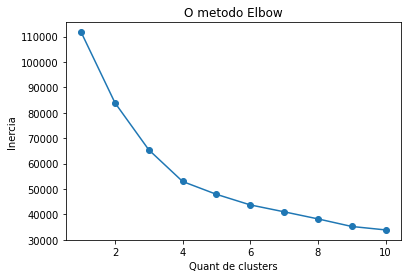

In [50]:
calcularInercia(dados1)

#### criar e treinar algoritimo

In [51]:
clusters1 = criarCluster(4,dados1)
dados1["x_train"]["Clusters"]= clusters1["Label"]
dados1["x_train"]

c:\users\thiago\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD,MES_PLANTIO,Clusters
6240,0,0,1,1,24.64,5.45,3,4,0
1547,2,1,1,0,20.05,1.99,3,10,1
1195,0,0,6,0,15.23,1.00,4,6,2
6890,2,1,0,1,20.84,0.00,4,6,0
7917,0,0,0,1,25.03,5.10,3,2,0
...,...,...,...,...,...,...,...,...,...
1908,2,1,2,0,21.69,4.00,3,8,1
5025,1,1,2,0,21.28,1.02,3,3,0
5103,0,0,0,0,22.42,7.31,5,4,3
2442,1,1,4,0,17.96,1.29,5,1,2


In [52]:
mostrarMediaCluster(dados1["x_train"])

,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD,MES_PLANTIO
Clusters,,,,,,,,
0,1.323099,0.717836,1.349415,0.432749,22.672310,2.766784,3.697368,3.258772
1,1.116919,0.607978,1.121045,0.220083,22.976355,2.620468,3.464924,9.826685
2,1.103990,0.602177,3.848851,0.044740,16.738670,2.158259,3.316808,5.714631
3,1.317536,0.651659,1.045024,0.146919,21.762156,9.717701,3.571090,5.263033


[0 1 2 3]


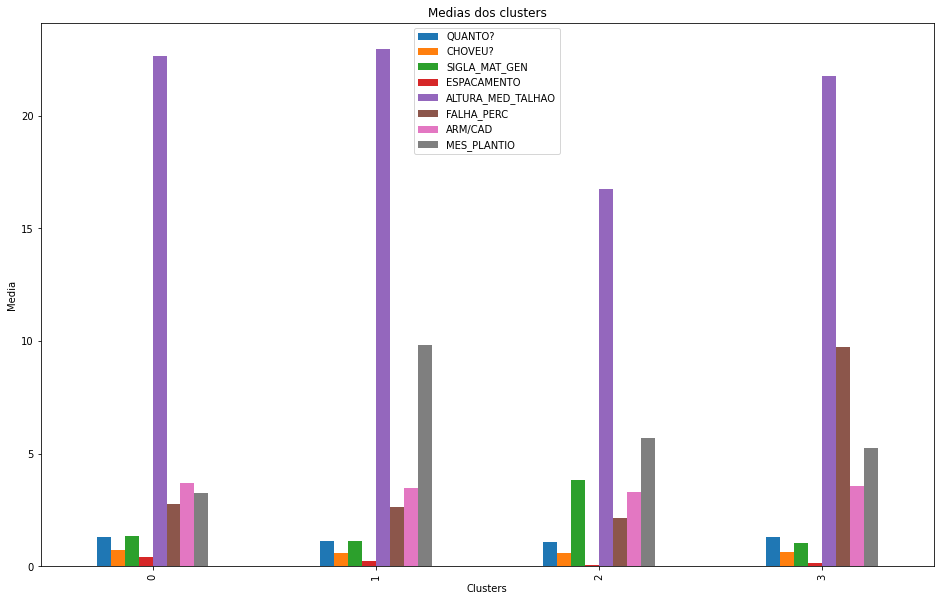

In [53]:
plotagemBarraClusters(dados1["x_train"])

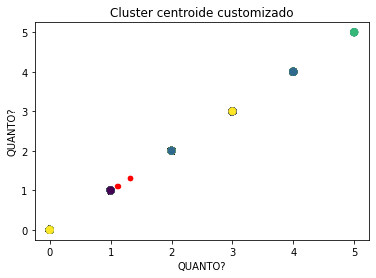

In [54]:
plotaCirculo(colunas, dados1["x_train"], clusters1["Kmeans"])

##### Na comparação das colunas altura x mes plantio e falha por mes plantio mostra, que a falha é somente vista frquentimente nos meses maio a agosto. E a altura é melhor no meses do final de ano 

### Criando algoritimo da amostra2

In [55]:
dados2=criarTestTrainUnsupervised(amostra2)
dados2["x_train"]

,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD,MES_PLANTIO
4641,1,1,1,0,24.23,0.00,4,11
5117,0,0,1,0,22.75,9.86,3,2
7839,0,0,0,1,24.27,3.24,5,2
3745,3,1,0,2,19.58,2.50,5,7
1201,0,0,8,0,16.66,1.05,4,6
...,...,...,...,...,...,...,...,...
7599,4,1,2,0,23.92,3.92,3,8
1261,0,0,3,1,22.25,3.92,5,3
5077,3,1,2,0,21.33,6.55,5,4
2434,0,0,2,0,19.08,5.01,2,1


1 109862.85570435131
2 79672.24074061317
3 64166.567454626376
4 51827.0430129236
5 45993.02312476472
6 42078.26223127842
7 39025.34798370726
8 36379.957928283795
9 34601.7830462681
10 32876.043191600955


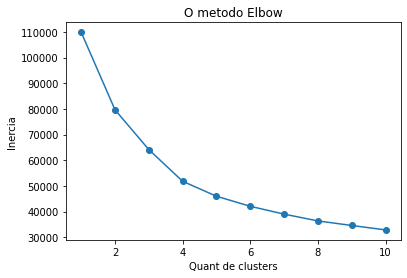

In [56]:
calcularInercia(dados2)

In [57]:
clusters2 = criarCluster(4,dados2)
dados2["x_train"]["Clusters"]= clusters2["Label"]
dados2["x_train"]

c:\users\thiago\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD,MES_PLANTIO,Clusters
4641,1,1,1,0,24.23,0.00,4,11,0
5117,0,0,1,0,22.75,9.86,3,2,2
7839,0,0,0,1,24.27,3.24,5,2,3
3745,3,1,0,2,19.58,2.50,5,7,0
1201,0,0,8,0,16.66,1.05,4,6,1
...,...,...,...,...,...,...,...,...,...
7599,4,1,2,0,23.92,3.92,3,8,0
1261,0,0,3,1,22.25,3.92,5,3,3
5077,3,1,2,0,21.33,6.55,5,4,3
2434,0,0,2,0,19.08,5.01,2,1,3


In [58]:
mostrarMediaCluster(dados2["x_train"])

,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD,MES_PLANTIO
Clusters,,,,,,,,
0,1.152672,0.618321,1.230534,0.189313,22.839145,2.705237,3.429008,9.598473
1,1.103018,0.581686,3.789802,0.114464,16.547128,2.540229,3.321540,5.928200
2,1.135371,0.606987,1.192140,0.279476,22.675590,11.445066,3.375546,6.082969
3,1.463659,0.746867,1.271930,0.402256,22.721140,3.234185,3.666667,3.258145


[0 2 3 1]


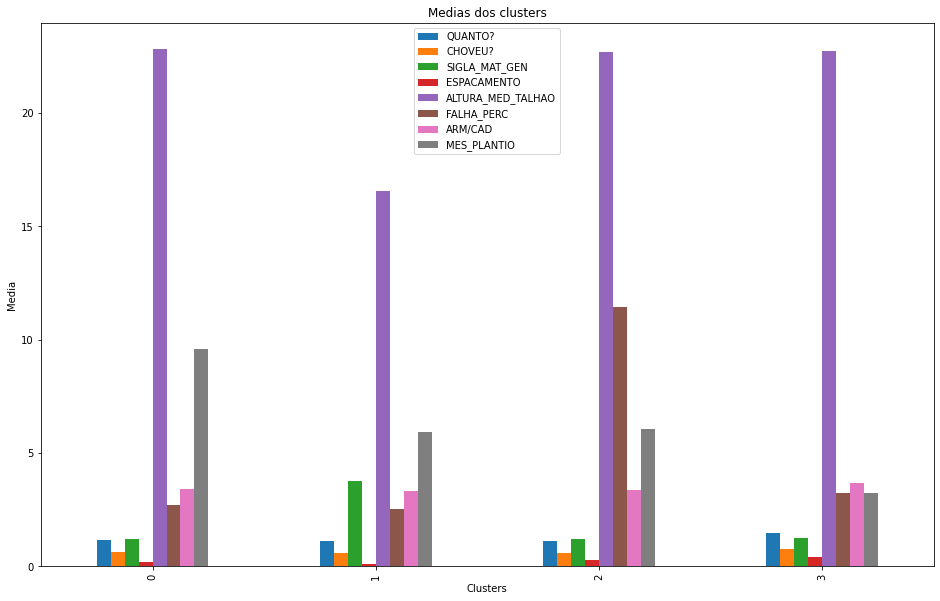

In [59]:
plotagemBarraClusters(dados2["x_train"])

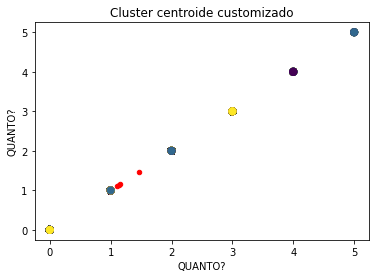

In [60]:
plotaCirculo(colunas, dados2["x_train"], clusters2["Kmeans"])

### Criando algoritimo da amostra3

In [61]:
dados3=criarTestTrainUnsupervised(amostra3)
dados3["x_train"]

,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD,MES_PLANTIO
5681,3,1,2,0,23.82,16.67,2,3
6783,0,0,8,0,20.32,3.60,4,12
992,2,1,0,0,16.26,1.14,2,5
5795,1,1,0,0,18.68,4.50,3,5
2758,1,1,5,0,19.67,2.52,3,3
...,...,...,...,...,...,...,...,...
7583,0,0,0,0,26.46,4.00,3,8
670,2,1,4,0,15.42,0.38,4,3
3172,1,1,4,0,16.73,0.72,4,4
4314,3,1,1,0,18.96,1.94,5,2


1 118238.83171438155
2 86260.39457985204
3 66740.09920795937
4 55293.09153712439
5 48251.55894295489
6 44266.63501037881
7 40600.62706022111
8 37740.64090657101
9 35331.70165743839
10 33109.49762695239


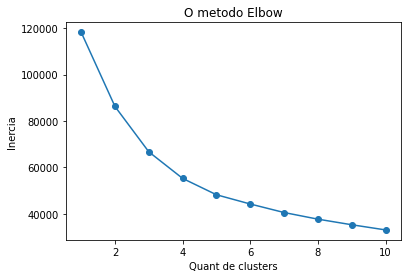

In [62]:
calcularInercia(dados3)

In [63]:
clusters3 = criarCluster(4,dados3)
dados3["x_train"]["Clusters"]= clusters3["Label"]
dados3["x_train"]

c:\users\thiago\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD,MES_PLANTIO,Clusters
5681,3,1,2,0,23.82,16.67,2,3,2
6783,0,0,8,0,20.32,3.60,4,12,1
992,2,1,0,0,16.26,1.14,2,5,0
5795,1,1,0,0,18.68,4.50,3,5,3
2758,1,1,5,0,19.67,2.52,3,3,0
...,...,...,...,...,...,...,...,...,...
7583,0,0,0,0,26.46,4.00,3,8,1
670,2,1,4,0,15.42,0.38,4,3,0
3172,1,1,4,0,16.73,0.72,4,4,0
4314,3,1,1,0,18.96,1.94,5,2,3


In [64]:
mostrarMediaCluster(dados3["x_train"])

,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD,MES_PLANTIO
Clusters,,,,,,,,
0,1.039501,0.575884,4.220374,0.110187,16.715426,2.137006,3.379418,6.029106
1,1.193252,0.627301,1.130368,0.171779,22.812071,2.604248,3.510736,9.674847
2,1.193676,0.636364,1.134387,0.173913,22.918182,12.150909,3.707510,6.122530
3,1.472460,0.741738,1.401469,0.434517,22.129694,3.954688,3.697674,3.210526


[2 1 0 3]


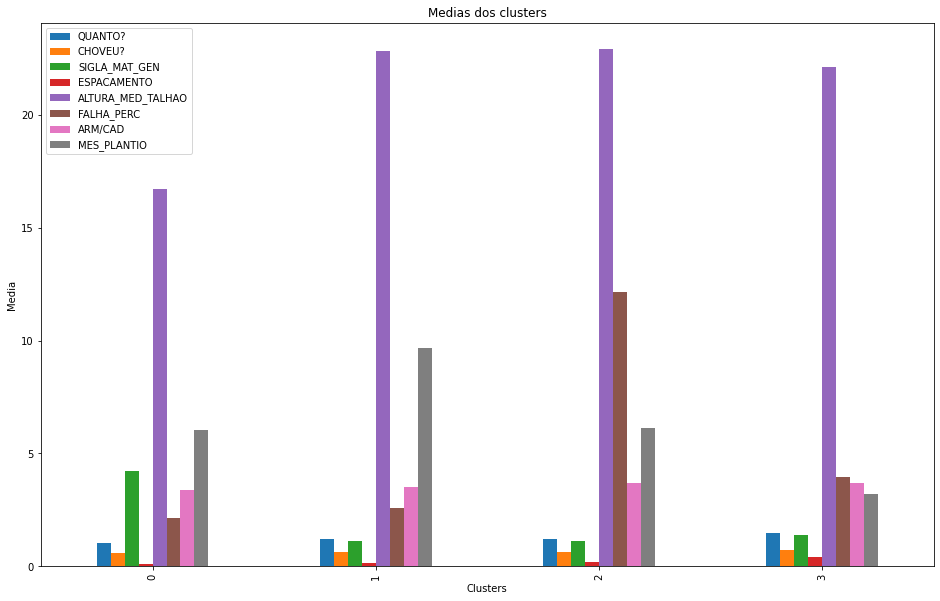

In [65]:
plotagemBarraClusters(dados3["x_train"])

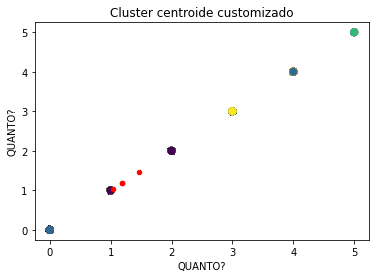

In [66]:
plotaCirculo(colunas, dados3["x_train"], clusters3["Kmeans"])

### Foram divididos em quatro cluster sendo que:
- um cluster mostra que o periodo dos meses são no intervalo de set a dez com uma altura do fruste alta
- um cluster mostra uma alta quantidade de falhas e o periodo medio é do mes de maio a agost
- um cluster mostra a menor altura dos eucalipuitos porem a menor falha, sendo que pode ser a contribuição do material generico
- um cluster com a maior altura, por causa do pediodo mensal de jan a abr

## Conclusão das amostras
### Ao Analisar as amostra foi constatado que o periodo mensal afeta a produtividade que causa um falha alta no meses de maio a agosto
### Os periodos com a arvores mais altas e as falhas são mais baixas são quando são plantadas no meses de janeiro a abril e setembro a dezenbro, sendo que as avores mais alta são aquela plantadas no meses de set a dez

### Os dados da população não são muito proximos, então as analise da cada amostra precisou ser feita com quase 50% da população para que a analise não corre-se falha do entendimento da analise.

## Analise do cluster com o periodo mensal maior
### Criando arvore de decisão

In [81]:
clusterM= dados3["x_train"].query("Clusters=='1'")

In [82]:
clusterM=clusterM.drop(columns=["Clusters"])

In [83]:
clusterM

,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD,MES_PLANTIO
6783,0,0,8,0,20.32,3.60,4,12
44,0,0,0,0,23.48,3.77,3,10
156,0,0,3,0,22.95,4.17,4,10
2291,3,1,1,0,20.94,1.89,3,12
1560,3,1,1,0,19.96,2.03,5,10
...,...,...,...,...,...,...,...,...
1662,0,0,1,0,21.15,1.99,4,8
7493,1,1,0,0,24.65,1.39,4,8
6791,0,0,8,0,20.32,3.60,4,12
4730,4,1,0,0,24.69,0.00,5,12


In [84]:
clusterM.describe()

,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD,MES_PLANTIO
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,1.193252,0.627301,1.130368,0.171779,22.812071,2.604248,3.510736,9.674847
std,1.172948,0.483894,1.460130,0.377478,2.049328,1.996275,1.110573,1.731194
min,0.000000,0.000000,0.000000,0.000000,19.570000,0.000000,1.000000,6.000000
25%,0.000000,0.000000,0.000000,0.000000,20.940000,1.020000,3.000000,8.000000
50%,1.000000,1.000000,1.000000,0.000000,22.550000,1.990000,3.000000,10.000000
75%,2.000000,1.000000,1.000000,0.000000,24.690000,3.770000,4.000000,11.000000
max,5.000000,1.000000,8.000000,1.000000,26.460000,7.520000,5.000000,12.000000


#### Criar teste e treinamento

In [85]:
dados = criarTesteTreinamento("MES_PLANTIO",clusterM)

In [86]:
dados["x_train"]

,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD
1593,1,1,1,0,20.66,3.58,4
135,2,1,1,0,23.09,2.72,2
1840,0,0,1,0,19.97,1.36,1
2289,2,1,1,0,20.94,1.89,4
1890,2,1,0,0,20.53,0.94,3
...,...,...,...,...,...,...,...
6014,2,1,1,0,23.01,5.85,2
1990,0,0,0,0,22.15,6.68,4
7286,0,0,1,1,25.11,2.52,5
1532,2,1,0,0,22.30,0.00,3


#### Converterndo int para String

In [87]:
clusterM["MES_PLANTIO"]=clusterM["MES_PLANTIO"].astype("string")

#### Usando arvore automatica

Amostras erroneamente classificadas: 80
Acuracia: 0.59


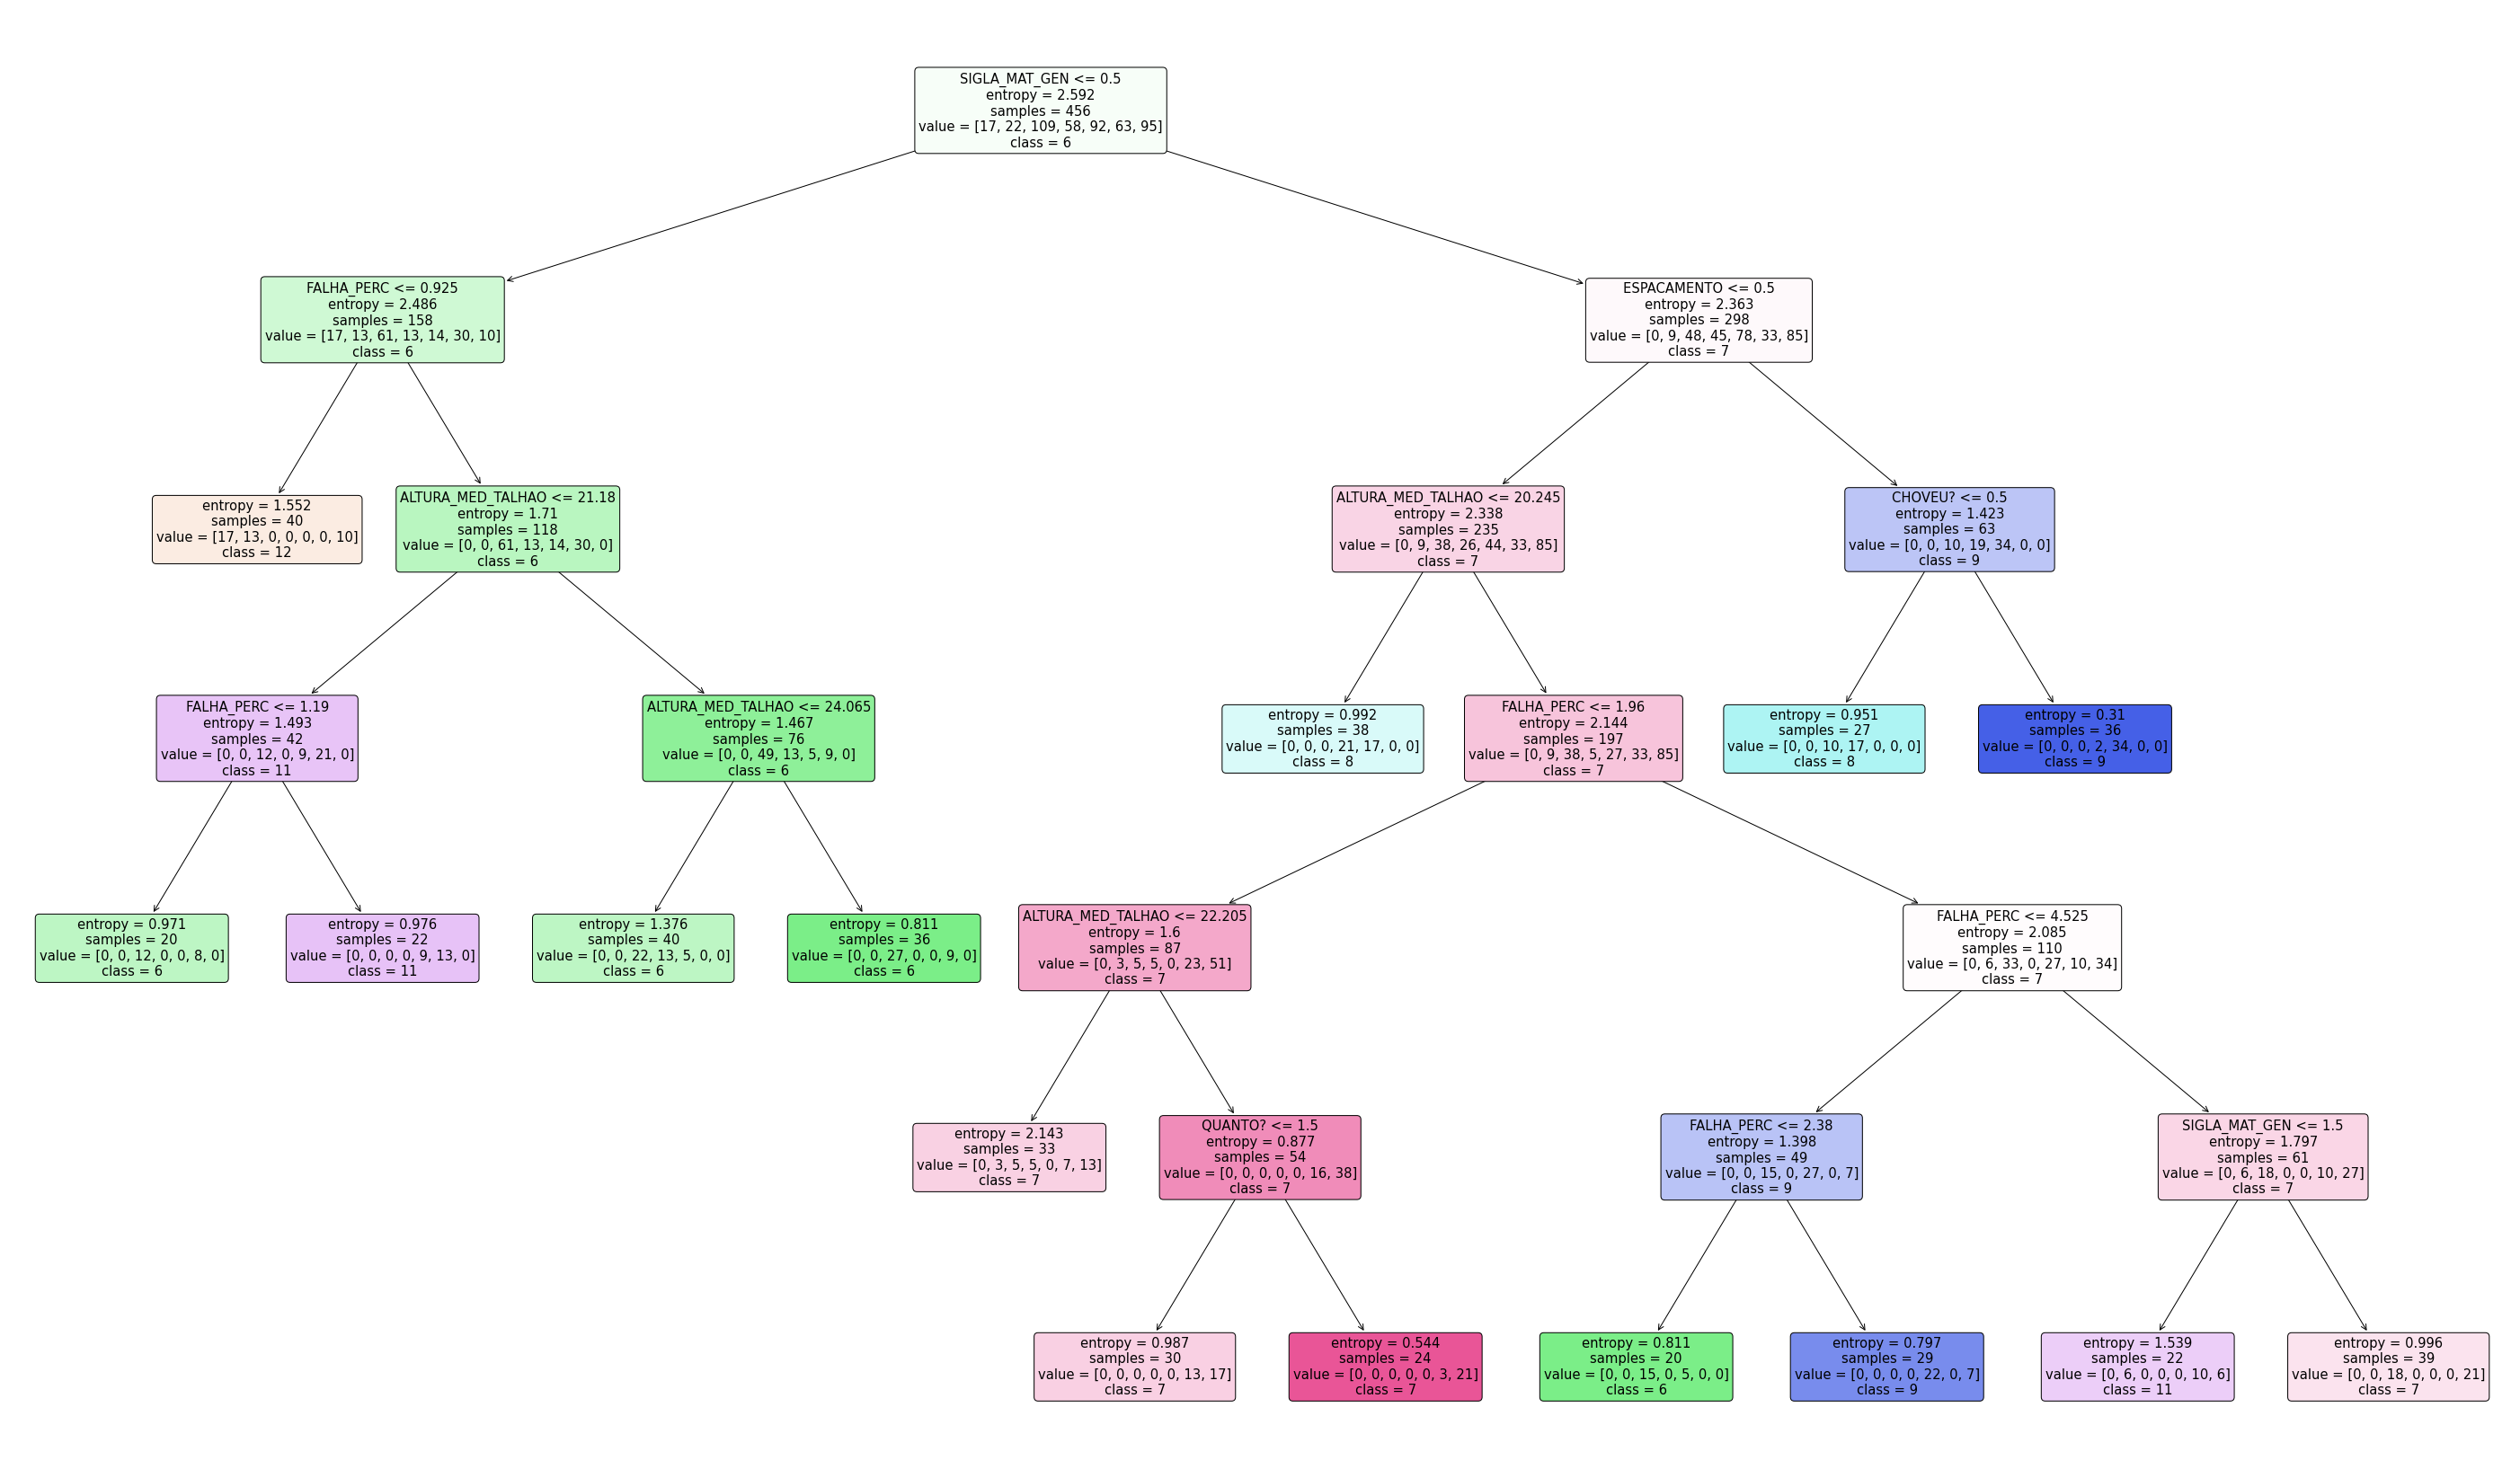

In [88]:
interador(dados, clusterM["MES_PLANTIO"].unique())

### criando arvore manual

In [89]:
arvore = DecisionTreeClassifier(criterion='entropy',
                                min_samples_leaf=7,
                                min_samples_split=10,
                                max_depth=10
                               )
arvore

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=7,
                       min_samples_split=10)

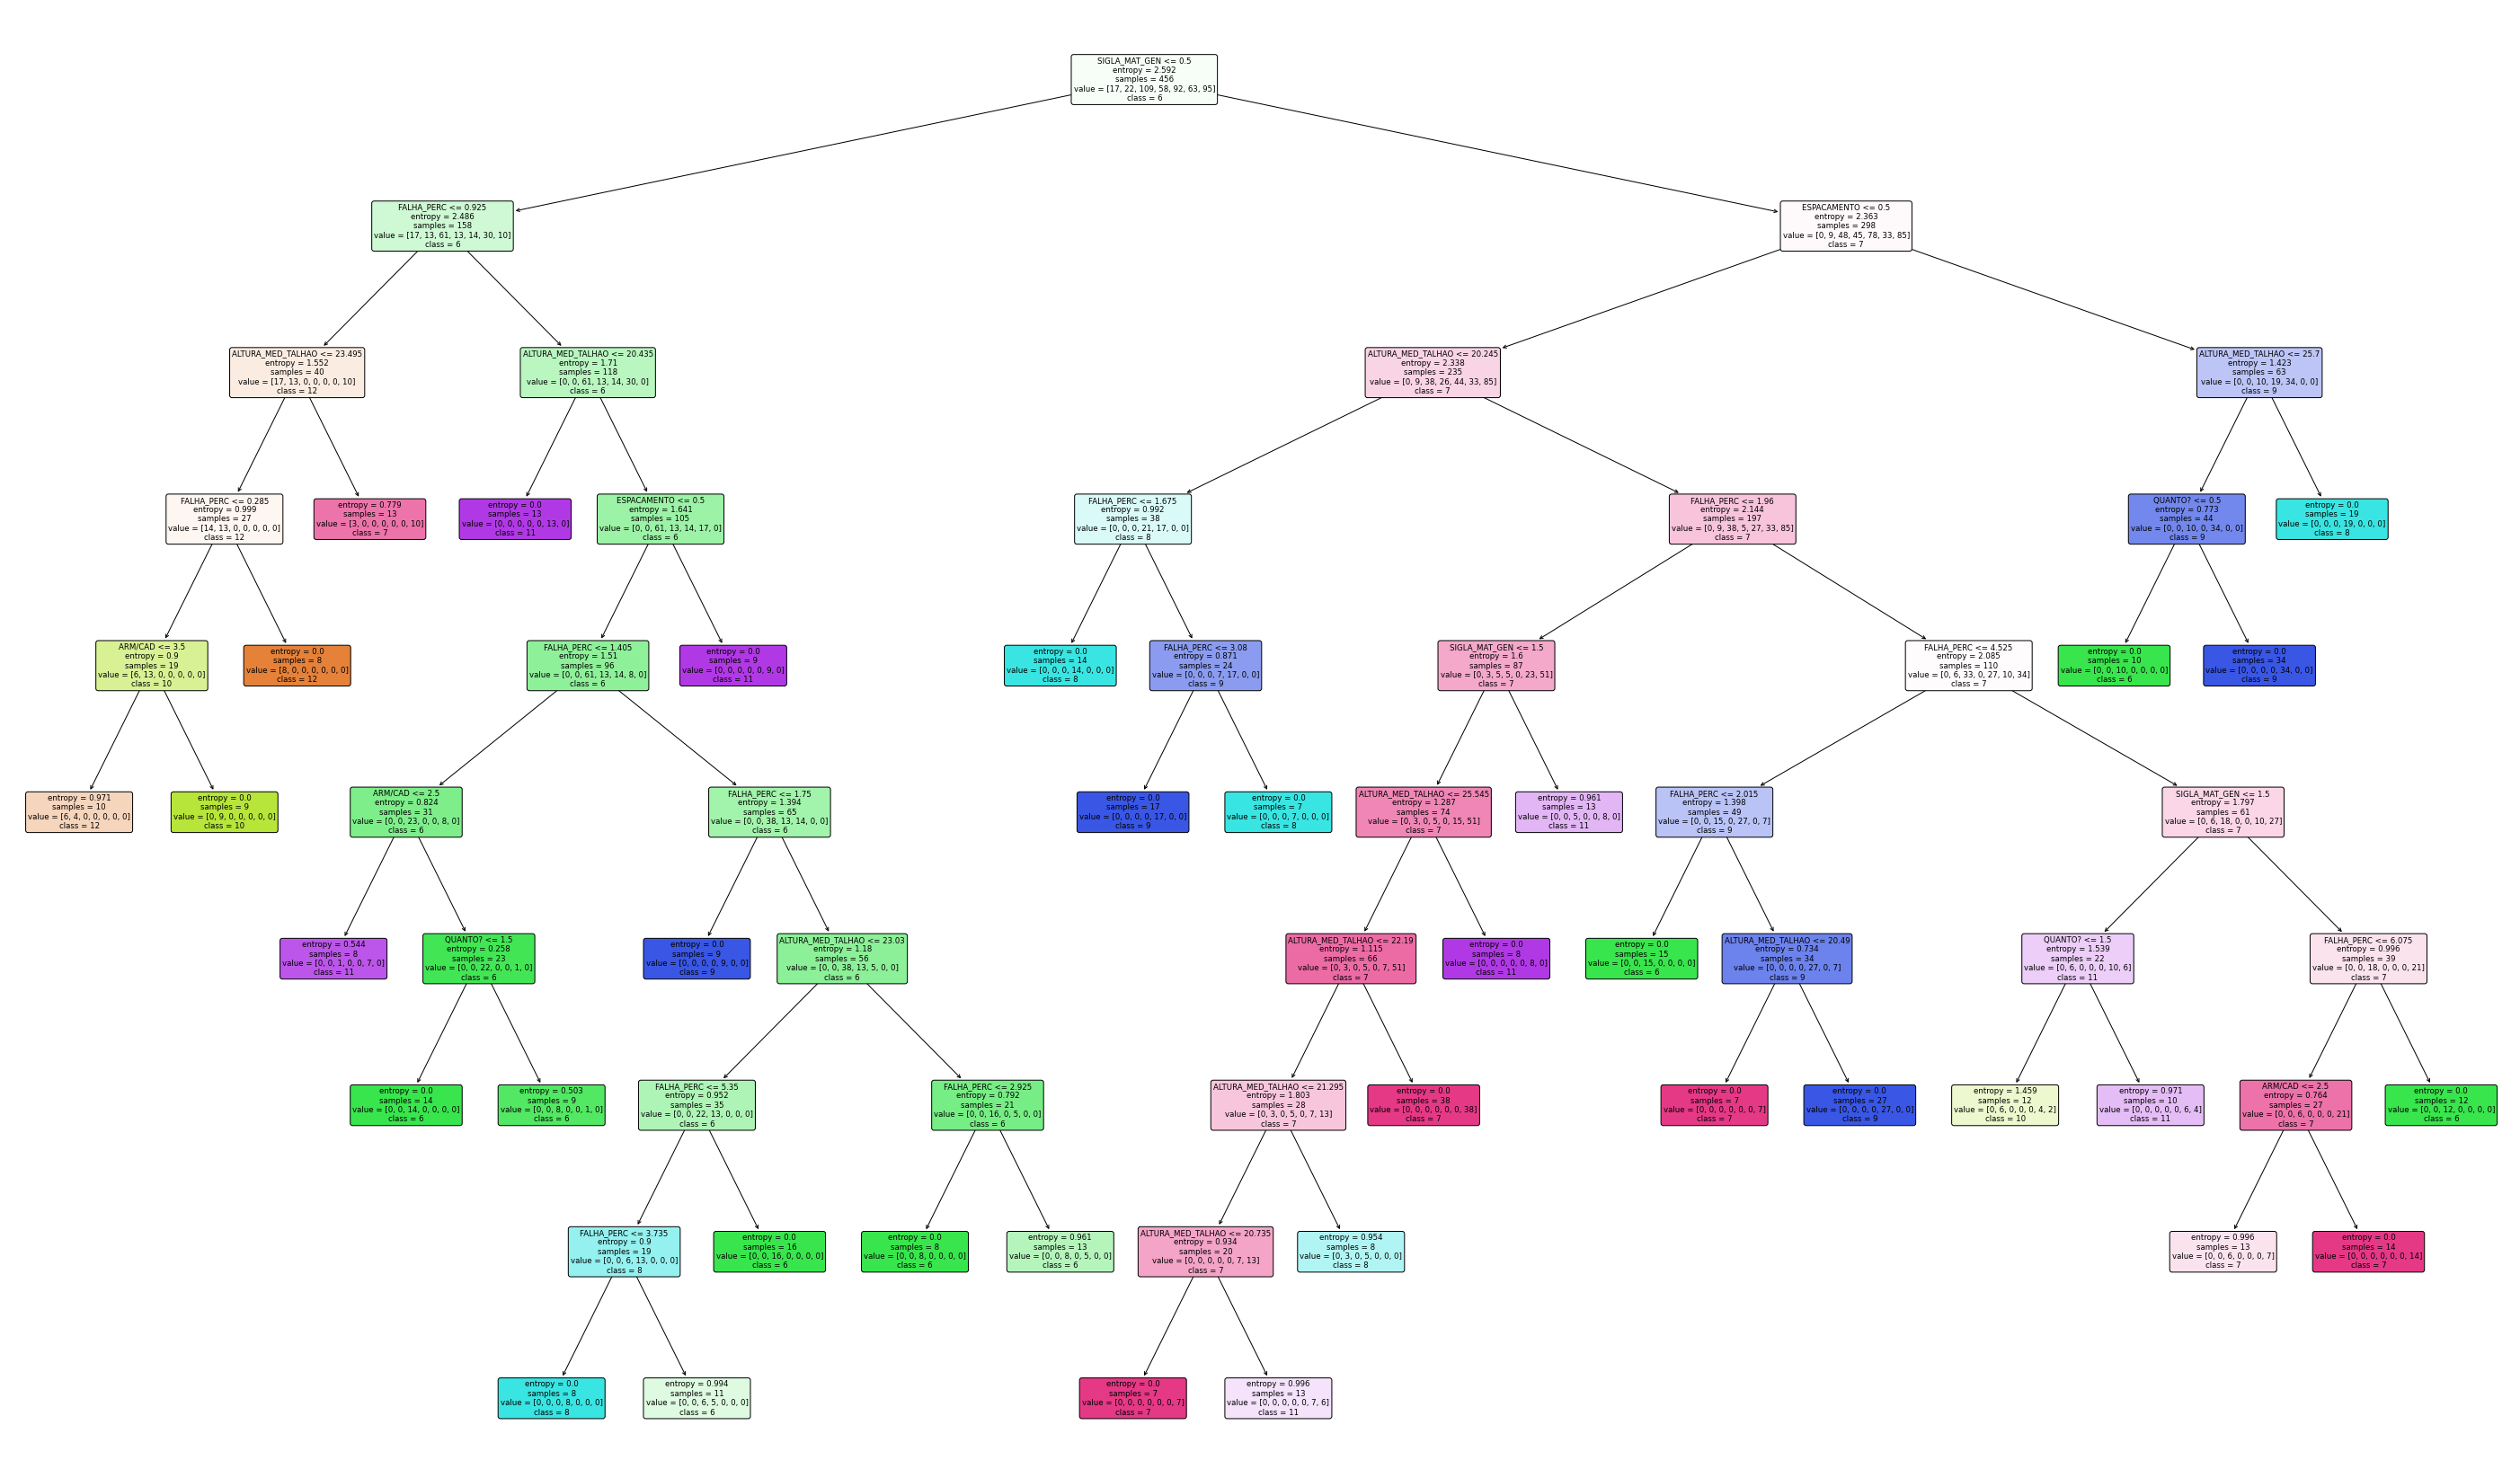

In [90]:
treinarPlotar(arvore, dados, clusterM["MES_PLANTIO"].unique())

### verificando arvore

In [91]:
verificarArvore(dados, arvore)

Amostras erroneamente classificadas: 40
Acuracia: 0.80


## Testando

### Para verificar o funcionamento da arvore foi utilizados alguns dados para teste
#### O algoritimos tem funcionalidade de prever qual é mais vantajoso para o plantio do eucalipito para a produção mais eficiente

In [92]:
dados["x_test"]

,QUANTO?,CHOVEU?,SIGLA_MAT_GEN,ESPACAMENTO,ALTURA_MED_TALHAO,FALHA_PERC,ARM/CAD
4628,0,0,1,0,26.01,1.92,3
1883,0,0,2,0,21.86,0.00,4
6779,3,1,8,0,20.32,3.60,4
5940,3,1,1,0,24.58,6.74,3
1567,3,1,1,0,19.96,2.03,5
...,...,...,...,...,...,...,...
8067,2,1,3,0,21.66,4.92,2
7297,0,0,1,1,25.11,2.52,5
6012,0,0,1,0,23.01,5.85,2
7245,2,1,1,1,24.17,0.00,5


In [93]:
dados["y_test"]

4628    11
1883     8
6779    12
5940    12
1567    10
        ..
8067     8
7297     8
6012    11
7245    10
7424     9
Name: MES_PLANTIO, Length: 196, dtype: int64

In [94]:
W_test = np.array([[0,0,1,0,25.05,0.69,2]]) 
p = arvore.predict(W_test)
for x in p:
    print("mes %s" %(x))

mes 12
